# Finding maxima using optimization

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pyphonon import *
from autograd import jacobian

# Check for GPU support
try:
    import cupy as cp
    import numpy as np
    GPU = True
    print(bcolors.OKGREEN+'GPU Support Enabled'+bcolors.ENDC)
except ImportError:
    import numpy as np
    GPU = False
    print(bcolors.WARNING+'Cupy Not available in your system. No GPU Support'+bcolors.ENDC)

# Ignore large warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Set some flags and environment variables
data_dir     = './data/'
fluid_dir    = 'fluids/'
particle_dir = 'particles/'

%matplotlib widget

CUDA GPU Acceleration is unavailable for your system : (
Cupy Not available in your system. No GPU Support


In [2]:
# Create an estimator

# Simulator parameters
max_order   = 0
n_cores     = 20
slow        = False

# Create estimator
E = estimator(max_order=max_order,n_cores=n_cores,slow=slow,GPU=GPU)

Generating Estimator for order 0
Assembling the estimator using multiprocessing on 20 cores
Permuations created successfully
	Send the fast data to the pool
CUDA GPU Acceleration is unavailable for your system : (
	Fast: 0, 0 Done!
Pool closed Successfully
recasting functions


  0%|          | 0/1 [00:00<?, ?it/s]

Estimator Generated Successfully


In [3]:
# Simulation parameters
r   = 1.
# z   = 
# t   = 
v   = 5.
l   = 0.

# Estimator caller
p = lambda x: -E(r,x[0],x[1],v,l)

# Jacobian
jac = jacobian(p)

# Define optimization constraints
constraints_ineq = {
    'type': 'ineq',
    'fun':  lambda x: np.array([x[0]**2 + v**2 * x[1]**2 - 2*x[0]*v*x[1] - r*(v**2-1)]),
    'jac':  lambda x: np.array([2*x[0] - 2*v*x[1],2*v**2*x[1]-2*v*x[0]]),
}

constraints_eq ={
    'type': 'eq',
    'fun':  lambda x: np.array([x[0]**2 + r**2/(1-v**2)]),
    'jac':  lambda x: np.array([2*x[0],0])
}

In [4]:
# # Do the optimization
# x0 = np.array([np.sqrt(-r**2/(1-v**2)),r-0.01])
# res = minimize(p,x0,method='SLSQP',jac=jac,
#                 constraints=[constraints_eq,constraints_ineq],options={'ftol': 1e-9, 'disp': True})

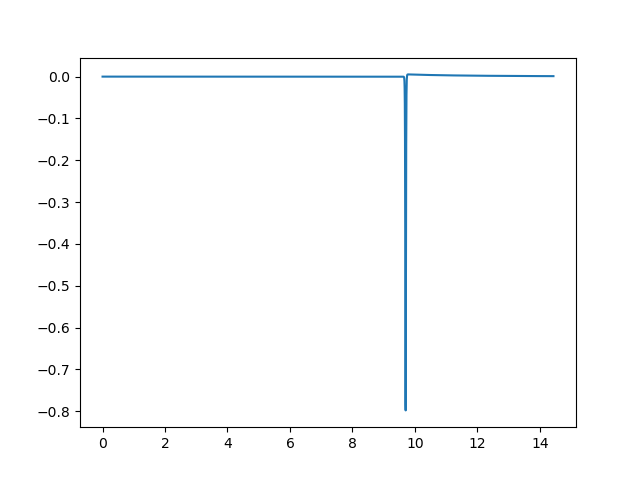

In [5]:
plt.figure()
r   = 0.2
z   = 9.7
t   = np.linspace(0,30,10000)
v   = 1.67
l   = 0.
plt.plot(t,E(r,z,t,v,l))

In [6]:
z/v

5.8083832335329335